In [1]:
import os, sys, glob, re, requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import rasterio as rio

In [2]:
from geocube.api.core import make_geocube

In [3]:
root = "/home/users/apoorval/Research/mobile_coverage"
cbm = root + "/collins_bartholomew/"
out = root + "/output/"

# GSM 

In [4]:
cov_files = glob.glob(cbm + '**/Global_GSM_*.shp', recursive = True)
cov_files.sort()
cov_files

['/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201112 - ESRI SHAPE/Data/Global_GSM_201112.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201212 - ESRI SHAPE/Data/Global_GSM_201212.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201312 - ESRI SHAPE/Data/Global_GSM_201312.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201412 - ESRI SHAPE/Data/Global_GSM_201412.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201512 - ESRI SHAPE/Data/Global_GSM_201512.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201612 - ESRI SHAPE/Data/Global_GSM_201612.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201712

## Dry run 

In [5]:
%%time
coverage = gpd.read_file(cov_files[0])
coverage.head()

CPU times: user 32.5 s, sys: 928 ms, total: 33.4 s
Wall time: 33.3 s


,CNTRY_CODE,COUNTRY,CNTRY_ISO,CNTRY_ISO2,CNTRY_ISO3,CNTRY_FIPS,Shape_Leng,Shape_Area,geometry
0,182.0,sea or ocean,0,None,None,None,8006.737572,626.124510,"MULTIPOLYGON (((-58.740 -62.217, -58.741 -62.2..."
1,146737.0,Isle of Man,833,IM,IMN,IM,1.522986,0.079581,"MULTIPOLYGON (((-4.816 54.039, -4.821 54.038, ..."
2,206923.0,Afghanistan,4,AF,AFG,AF,653.604896,17.590724,"MULTIPOLYGON (((60.980 29.931, 60.980 29.939, ..."
3,206924.0,Albania,8,AL,ALB,AL,18.634904,3.039897,"MULTIPOLYGON (((19.289 40.471, 19.284 40.470, ..."
4,206925.0,Algeria,12,DZ,DZA,AG,226.437923,20.287858,"MULTIPOLYGON (((5.653 23.076, 5.653 23.040, 5...."


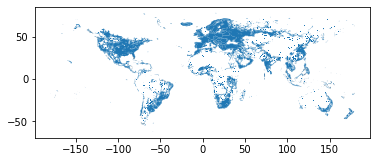

In [6]:
coverage.plot()

In [7]:
coverage['one'] = 1

In [8]:
%%time
cube = make_geocube(
    coverage,
    measurements=["one"],
    resolution=(0.1, -0.1),
)

CPU times: user 5min 9s, sys: 3 s, total: 5min 12s
Wall time: 5min 10s


/home/users/apoorval/.conda/envs/geo_env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:301: DeprecationWarning: Please use `str(crs)` instead of `crs.crs_str`
  warnings.warn("Please use `str(crs)` instead of `crs.crs_str`", category=DeprecationWarning)


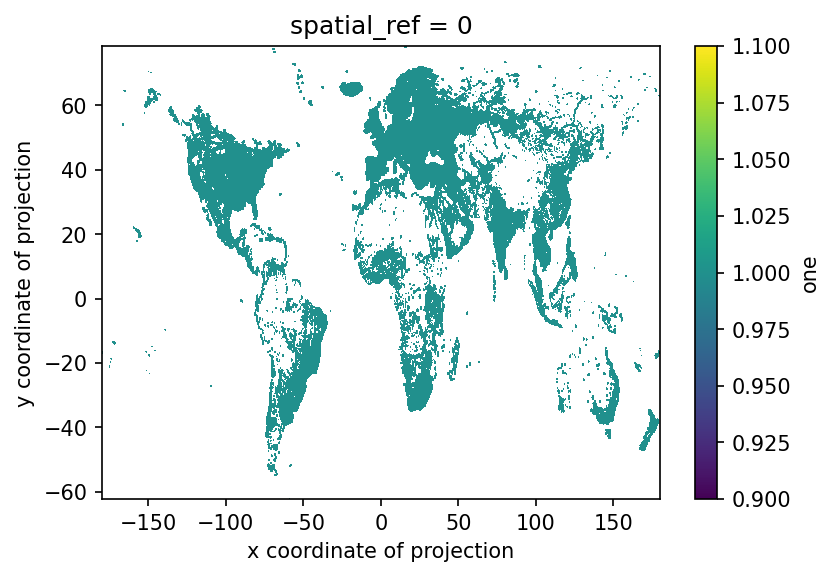

In [18]:
f, ax = plt.subplots(dpi = 150)
cube.one.plot(ax = ax)

In [14]:
name = cov_files[0].split("/")[-1].split(".")[0]

In [15]:
%%time 
cube.one.rio.to_raster(out + f"{name}.tif")

CPU times: user 59 ms, sys: 88.1 ms, total: 147 ms
Wall time: 446 ms


# Function to rasterize

In [7]:
def rasterise_coverage(inpath, res = 0.1, outdir = out):
    gdf = gpd.read_file(inpath)
    gdf.crs = {'init': 'epsg:4326'}
    gdf['coverage'] = 1 # create dummy
    cube = make_geocube(
        gdf,
        measurements=["coverage"],
        resolution=(res, -1 * res),
    )
    name = inpath.split("/")[-1].split(".")[0] + "_" + str(res).replace(".", "")
    cube.coverage.rio.to_raster(outdir + f"{name}.tif")

In [ ]:
%%time
from joblib import Parallel, delayed
Parallel(n_jobs=12)(delayed(rasterise_coverage)(i) for i in cov_files)

In [6]:
%%time
from joblib import Parallel, delayed
Parallel(n_jobs=21, verbose=10)(delayed(rasterise_coverage)(inpath = i, res = 0.05) for i in cov_files)

[Parallel(n_jobs=21)]: Using backend LokyBackend with 21 concurrent workers.
[Parallel(n_jobs=21)]: Done   4 out of  21 | elapsed:  1.5min remaining:  6.3min
[Parallel(n_jobs=21)]: Done   7 out of  21 | elapsed:  1.5min remaining:  3.0min
[Parallel(n_jobs=21)]: Done  10 out of  21 | elapsed:  1.6min remaining:  1.8min
[Parallel(n_jobs=21)]: Done  13 out of  21 | elapsed:  1.7min remaining:  1.0min
[Parallel(n_jobs=21)]: Done  16 out of  21 | elapsed:  6.2min remaining:  1.9min
[Parallel(n_jobs=21)]: Done  19 out of  21 | elapsed: 24.0min remaining:  2.5min


CPU times: user 214 ms, sys: 347 ms, total: 560 ms
Wall time: 39min 13s


[Parallel(n_jobs=21)]: Done  21 out of  21 | elapsed: 39.2min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# 3G 

In [4]:
three_jee = glob.glob(cbm + '**/Global_3G_*.shp', recursive = True)
three_jee.sort()
three_jee

['/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201112 - ESRI SHAPE/Data/Global_3G_201112.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201212 - ESRI SHAPE/Data/Global_3G_201212.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201312 - ESRI SHAPE/Data/Global_3G_201312.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201412 - ESRI SHAPE/Data/Global_3G_201412.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201512 - ESRI SHAPE/Data/Global_3G_201512.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201612 - ESRI SHAPE/Data/Global_3G_201612.shp',
 '/home/users/apoorval/Research/mobile_coverage/collins_bartholomew/Mobile Coverage Explorer WGS84 v201712 - ESR

In [5]:
len(three_jee)

11

In [ ]:
%%time
from joblib import Parallel, delayed
Parallel(n_jobs=11, verbose=10)(delayed(rasterise_coverage)(inpath = i, res = 0.05) for i in three_jee)

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
